# Tutorial con la ecuación de Lindblad y QMC
$\renewcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\renewcommand{\bra}[1]{\left\langle{#1}\right|}$
$\renewcommand{\braket}[1]{\left\langle{#1}\right\rangle}$

Artículo: https://arxiv.org/pdf/1906.04478.pdf

Documentación: https://qutip.org/documentation.html


Se prueban dinámicas de sistemas cuánticos con dos métodos distintos: la integración de la ecuación de Lindblad y el método de Monte Carlo cuántico.

En primer lugar, se importan los paquetes que se van a usar en el programa. Del paquete \texttt{matplotlib} importamos la función \texttt{pyplot}, renombrándola como \texttt{plt} cuando la usemos.

In [52]:
import matplotlib.pyplot as plt

Importamos \texttt{numpy} como \texttt{np}.

In [53]:
import numpy as np

De \texttt{qutip} lo importamos todo, simbolizado con el asterisco (\texttt{*}).

In [54]:
from qutip import *

Como en el artículo, se realiza con un sistema de dos niveles, cuyo hamiltoniano es el siguiente
    
$$H = E \ket{1}\bra{1} + \Omega\left(\ket{0}\bra{1} + \ket{1}\bra{0}  \right).$$

Tomamos los parámetros del artículo, además de crear una base de los vectores $\ket{0}$ y $\ket{1}$.

In [55]:
N = 2 # Dimensión del espacio de Hilbert

psi0 = basis(N,0) # Vector |0>
psi1 = basis(N,1) # Vector |1>

Definición del hamiltoniano como una función. Esto se hace con \texttt{lambda}, seguido de los parámetros de los que dependerá. Tras los dos puntos, escribimos la forma de la función que estamos definiendo.

In [56]:
Hfun = lambda E, omega: E*psi1*psi1.dag() + omega*(psi0*psi1.dag() + psi1*psi0.dag()) 

El vector inicial será $\ket{1}$. Hacemos la simulación sin ningún término disipativo. Dichos términos se introducen en \texttt{c_op_list}, con formato de lista, con la función \texttt{append}.

In [57]:
# Definición de los parámetros y evaluación en la función que define al Hamiltoniano
omega = 1.0   
E = 1.0
H = Hfun(E, omega)

# Parámetros de la simulación: vector (o matriz densidad) inicial, vector de tiempos y lista de operadores de Lindblad
psiini = basis(N,1)   # |1>
tlist = np.linspace(0,5,1000) # Vector de tiempos
c_op_list = [] # Sin disipacion

Para el caso del Monte Carlo Cuántico, tenemos que definir también un número de trayectorias

In [58]:
ntraj = 100

Realizamos las evoluciones temporales (https://qutip.org/docs/latest/guide/guide-dynamics.html). Vamos a usar tres funciones distintas:

#### sesolve

Resuelve la ecuación de Schrödinger para un vector o una matriz unitaria para un hamiltoniano dado. Útil si no hay términos disipativos.

#### mesolve

Resuelve la ecuación de Lindblad para un vector dado o una matriz densidad. Se pueden de aportar (o no) los operadores de la parte disipativa.

#### mcsolve

Algoritmo de Monte Carlo Cuántico para un vector de estado, un hamiltoniano dado y unos operadores que marcan la disipación. Si estos no son incluidos, se llama directamente a la función sesolve. Hemos de dar el número de trayectorias.


## Caso sin disipación

Resolvemos el caso sin disipación para la Ecuación de Lindblad. Vamos a indicar que nos promedie $\ket{0}\bra{0}$ y $\ket{1}\bra{1}$.

In [59]:
me = mesolve(H, psiini, tlist, c_op_list, [psi0*psi0.dag(),psi1*psi1.dag()])

Se crea una clase, \texttt{me}, donde podemos acceder a distintos parámetros. Si no indicamos nada para promediar, podemos acceder a la evolución del estado.

In [60]:
me = mesolve(H, psiini, tlist, c_op_list)
me.states

[Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [1.]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-1.25249485e-05-0.00500496j]
  [ 9.99974950e-01-0.00500494j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-5.00987805e-05-0.01000968j]
  [ 9.99899802e-01-0.01000951j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-1.12718073e-04-0.01501389j]
  [ 9.99774560e-01-0.01501332j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-2.00378774e-04-0.02001735j]
  [ 9.99599232e-01-0.02001601j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-3.13074319e-04-0.0250198j ]
  [ 9.99373830e-01-0.02501719j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-4.50795206e-04-0.030021j  ]
  [ 9.99098367e-01-0.030016

Para ver los valores esperados, hacemos lo siguiente:

In [61]:
me = mesolve(H, psiini, tlist, c_op_list, [psi0*psi0.dag(),psi1*psi1.dag()])

me.expect[0] # Primer elemento de la lista

array([0.00000000e+00, 2.50498135e-05, 1.00196117e-04, 2.25429497e-04,
       4.00734267e-04, 6.26088470e-04, 9.01463875e-04, 1.22682599e-03,
       1.60213408e-03, 2.02734113e-03, 2.50239389e-03, 3.02723286e-03,
       3.60179230e-03, 4.22600027e-03, 4.89977858e-03, 5.62304283e-03,
       6.39570240e-03, 7.21766056e-03, 8.08881440e-03, 9.00905485e-03,
       9.97826665e-03, 1.09963284e-02, 1.20631126e-02, 1.31784855e-02,
       1.43423075e-02, 1.55544325e-02, 1.68147089e-02, 1.81229791e-02,
       1.94790794e-02, 2.08828398e-02, 2.23340844e-02, 2.38326316e-02,
       2.53782934e-02, 2.69708761e-02, 2.86101799e-02, 3.02959996e-02,
       3.20281247e-02, 3.38063383e-02, 3.56304178e-02, 3.75001346e-02,
       3.94152544e-02, 4.13755371e-02, 4.33807371e-02, 4.54306027e-02,
       4.75248770e-02, 4.96632983e-02, 5.18455990e-02, 5.40715058e-02,
       5.63407398e-02, 5.86530168e-02, 6.10080473e-02, 6.34055362e-02,
       6.58451833e-02, 6.83266830e-02, 7.08497245e-02, 7.34139919e-02,
      

In [62]:
me.expect[1] # Segundo elemento de la lista

array([1.        , 0.99997495, 0.9998998 , 0.99977457, 0.99959927,
       0.99937391, 0.99909854, 0.99877317, 0.99839787, 0.99797266,
       0.99749761, 0.99697277, 0.99639821, 0.995774  , 0.99510022,
       0.99437696, 0.9936043 , 0.99278234, 0.99191119, 0.99099095,
       0.99002173, 0.98900367, 0.98793689, 0.98682151, 0.98565769,
       0.98444557, 0.98318529, 0.98187702, 0.98052092, 0.97911716,
       0.97766592, 0.97616737, 0.97462171, 0.97302912, 0.97138982,
       0.969704  , 0.96797188, 0.96619366, 0.96436958, 0.96249987,
       0.96058475, 0.95862446, 0.95661926, 0.9545694 , 0.95247512,
       0.9503367 , 0.9481544 , 0.94592849, 0.94365926, 0.94134698,
       0.93899195, 0.93659446, 0.93415482, 0.93167332, 0.92915028,
       0.92658601, 0.92398084, 0.92133509, 0.91864909, 0.91592318,
       0.9131577 , 0.910353  , 0.90750943, 0.90462735, 0.90170711,
       0.89874908, 0.89575363, 0.89272114, 0.88965198, 0.88654655,
       0.88340523, 0.88022841, 0.87701649, 0.87376988, 0.87048

Hacemos lo propio con Monte Carlo, indicando al final el número de trayectorias.

In [63]:
mc = mcsolve(H, psiini, tlist, c_op_list, [psi0*psi0.dag(),psi1*psi1.dag()], ntraj)

En la representación gráfica señalaremos de color magenta el valor de $\ket{0}\bra{0}$ obtenido con QMC (en este caso concreto sesolve); amarillo para $\ket{1}\bra{1}$ y finalmente línea negra de puntos para comparar con la ecuación maestra.

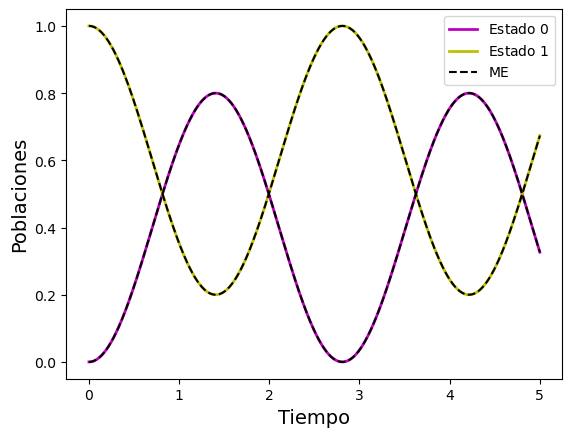

In [64]:
plt.plot(tlist, mc.expect[0],'m',lw=2)
plt.plot(tlist, mc.expect[1],'y',lw=2)
plt.plot(tlist, me.expect[0],'k--',lw=1.5)
plt.plot(tlist, me.expect[1],'k--',lw=1.5)
plt.xlabel('Tiempo',fontsize=14)
plt.ylabel('Poblaciones', fontsize=14)
plt.legend(('Estado ${0}$','Estado ${1}$', 'ME'))

## Caso con disipación

Vamos a introducir la disipación. Para ello, los operadores de Lindblad serán:

$$\sqrt{\gamma (1+n)} \sigma^+,$$
$$\sqrt{\gamma n} \sigma^-.$$


In [41]:
# Definición de los parámetros y de los operadores de Lindblad

gamma = 0.1
avg_n = 1.0



Aumentamos el número de trayectorias y el valor del tiempo final.

In [47]:
tlist2 = np.linspace(0,10,1000)
ntraj2 = 500

Definimos los operadores como lista y los añadimos con la función \texttt{append} para posteriormente introducirlos como tal en la función. 

In [48]:
c_op_list = []
c_op_list.append(np.sqrt(gamma * (1 + avg_n)) * sigmap())
c_op_list.append(np.sqrt(gamma * avg_n) * sigmam())

Notemos que podríamos haber hecho lo propio con los operadores que buscamos promediar (se introducen como lista), en este caso introducidos directamente en la función.

In [49]:
me2 = mesolve(H, psiini, tlist2, c_op_list, [psi0*psi0.dag(),psi1*psi1.dag()])

In [50]:
mc2 = mcsolve(H, psiini, tlist2, c_op_list, [psi0*psi0.dag(),psi1*psi1.dag()], ntraj2)

10.0%. Run time:   2.44s. Est. time left: 00:00:00:22
20.0%. Run time:   4.85s. Est. time left: 00:00:00:19
30.0%. Run time:   6.99s. Est. time left: 00:00:00:16
40.0%. Run time:   9.14s. Est. time left: 00:00:00:13
50.0%. Run time:  11.24s. Est. time left: 00:00:00:11
60.0%. Run time:  13.37s. Est. time left: 00:00:00:08
70.0%. Run time:  15.46s. Est. time left: 00:00:00:06
80.0%. Run time:  17.56s. Est. time left: 00:00:00:04
90.0%. Run time:  19.68s. Est. time left: 00:00:00:02
100.0%. Run time:  21.83s. Est. time left: 00:00:00:00
Total run time:  21.88s


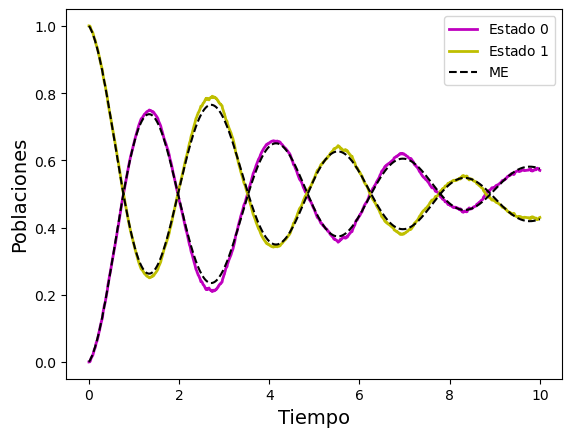

In [51]:
plt.plot(tlist2, mc2.expect[0],'m',lw=2)
plt.plot(tlist2, mc2.expect[1],'y',lw=2)
plt.plot(tlist2, me2.expect[0],'k--',lw=1.5)
plt.plot(tlist2, me2.expect[1],'k--',lw=1.5)
plt.xlabel('Tiempo',fontsize=14)
plt.ylabel('Poblaciones', fontsize=14)
plt.legend(('Estado ${0}$','Estado ${1}$', 'ME'))

## Caso con disipación y sin segundo término del hamiltoniano $(\Omega = 0)$. 

Creamos un nuevo hamiltoniano haciendo nulo el parámetro $\Omega$ introdicido previamente.

In [20]:
H3 = Hfun(E, 0)
tlist3 = np.linspace(0,20,2000)
ntraj3 = 1000

In [21]:
me3 = mesolve(H3, psiini, tlist3, c_op_list, [psi0*psi0.dag(),psi1*psi1.dag()])

In [22]:
mc3 = mcsolve(H3, psiini, tlist3, c_op_list, [psi0*psi0.dag(),psi1*psi1.dag()], ntraj2)

10.0%. Run time:   7.97s. Est. time left: 00:00:01:11
20.0%. Run time:   8.96s. Est. time left: 00:00:00:35
30.0%. Run time:   9.97s. Est. time left: 00:00:00:23
40.0%. Run time:  11.11s. Est. time left: 00:00:00:16
50.0%. Run time:  12.06s. Est. time left: 00:00:00:12
60.0%. Run time:  13.34s. Est. time left: 00:00:00:08
70.0%. Run time:  14.57s. Est. time left: 00:00:00:06
80.0%. Run time:  15.60s. Est. time left: 00:00:00:03
90.0%. Run time:  16.67s. Est. time left: 00:00:00:01
100.0%. Run time:  17.70s. Est. time left: 00:00:00:00
Total run time:  17.77s


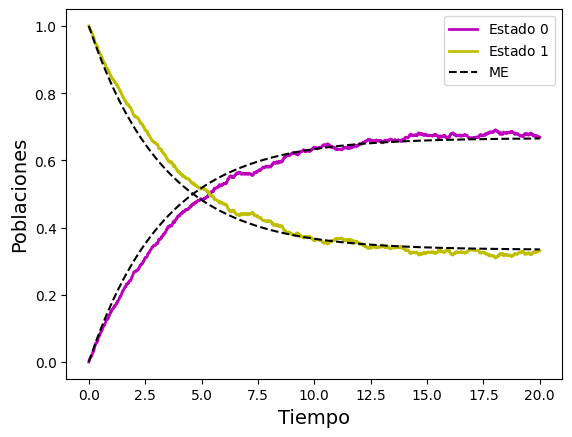

In [23]:
plt.plot(tlist3, mc3.expect[0],'m',lw=2)
plt.plot(tlist3, mc3.expect[1],'y',lw=2)
plt.plot(tlist3, me3.expect[0],'k--',lw=1.5)
plt.plot(tlist3, me3.expect[1],'k--',lw=1.5)
plt.xlabel('Tiempo',fontsize=14)
plt.ylabel('Poblaciones', fontsize=14)
plt.legend(('Estado ${0}$','Estado ${1}$', 'ME'))


Otra opción interesante es cambiar el número de trayectorias. Simplemente, añadimos una lista con las trayectorias que deseemos para la simulación en lugar de un único parámetro.

In [24]:
ntraj_list = [1, 10, 100, 1000, 5000] # list of number of trajectories to avg. over

In [25]:
mc_list = mcsolve(H3, psiini, tlist3, c_op_list, [psi0*psi0.dag(),psi1*psi1.dag()], ntraj_list)

10.0%. Run time:  15.81s. Est. time left: 00:00:02:22
20.0%. Run time:  22.67s. Est. time left: 00:00:01:30
30.0%. Run time:  29.17s. Est. time left: 00:00:01:08
40.0%. Run time:  36.98s. Est. time left: 00:00:00:55
50.0%. Run time:  44.96s. Est. time left: 00:00:00:44
60.0%. Run time:  53.04s. Est. time left: 00:00:00:35
70.0%. Run time:  60.84s. Est. time left: 00:00:00:26
80.0%. Run time:  67.77s. Est. time left: 00:00:00:16
90.0%. Run time:  74.34s. Est. time left: 00:00:00:08
100.0%. Run time:  80.85s. Est. time left: 00:00:00:00
Total run time:  80.95s


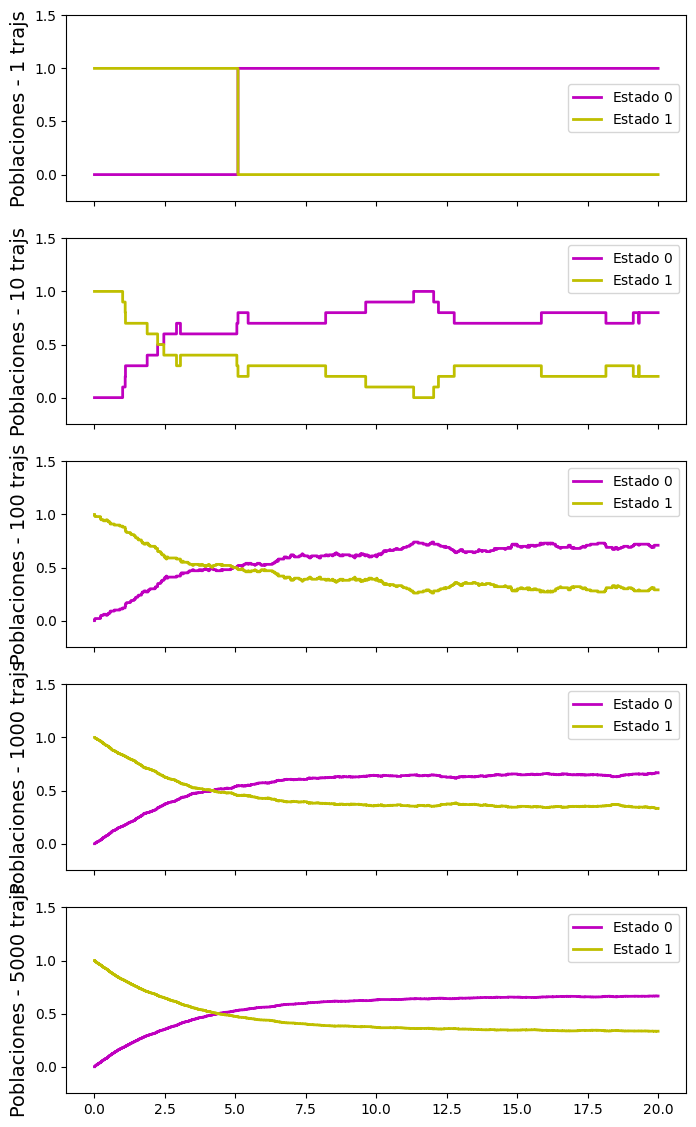

In [26]:
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(8,14))


for idx, n in enumerate(ntraj_list):

    axes[idx].step(tlist3, mc_list.expect[idx][0], 'm', lw=2)
    axes[idx].step(tlist3, mc_list.expect[idx][1], 'y', lw=2)
    
    axes[idx].set_yticks(np.linspace(0, 2, 5))
    axes[idx].set_ylim([-0.25, 1.5])
    axes[idx].set_ylabel('Poblaciones - %d trajs' % n, fontsize=14)
    
    axes[idx].legend(('Estado ${0}$','Estado ${1}$'))
